In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
test= pd.read_csv('/content/drive/MyDrive/DataSets/Usedcar price /test.csv')
train = pd.read_csv('/content/drive/MyDrive/DataSets/Usedcar price /train.csv')

In [5]:
print(train.shape,test.shape)

(290129, 20) (124341, 19)


In [ ]:
train.head()

,Unnamed: 0,id,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,posting_date,price
0,121610,7309831550,2007.0,infiniti,m45,excellent,NaN,gas,214740.0,clean,automatic,rwd,NaN,sedan,black,ga,34.139588,-83.971135,2021-04-20T11:46:13-0400,7995
1,395646,7317007429,2008.0,cadillac,escalade,NaN,NaN,gas,170276.0,clean,automatic,NaN,NaN,SUV,black,wa,47.756950,-122.212230,2021-05-04T16:16:32-0700,14999
2,236366,7309202024,2003.0,lexus,es,NaN,NaN,gas,176910.0,clean,automatic,fwd,NaN,sedan,NaN,nc,34.209703,-77.843995,2021-04-19T10:07:58-0400,5995
3,66001,7306341714,2017.0,bmw,320i,excellent,NaN,gas,41000.0,clean,automatic,4wd,NaN,SUV,NaN,ca,33.811000,-117.849300,2021-04-13T13:05:06-0700,0
4,320855,7307880118,2008.0,toyota,rav4,good,6 cylinders,gas,138900.0,clean,automatic,4wd,full-size,SUV,silver,pa,40.143550,-76.597071,2021-04-16T15:22:02-0400,7995


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290129 entries, 0 to 290128
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    290129 non-null  int64  
 1   id            290129 non-null  int64  
 2   year          290129 non-null  float64
 3   manufacturer  278787 non-null  object 
 4   model         290129 non-null  object 
 5   condition     174025 non-null  object 
 6   cylinders     170829 non-null  object 
 7   fuel          288676 non-null  object 
 8   odometer      290129 non-null  float64
 9   title_status  285063 non-null  object 
 10  transmission  290129 non-null  object 
 11  drive         202042 non-null  object 
 12  size          82445 non-null   object 
 13  type          227533 non-null  object 
 14  paint_color   203016 non-null  object 
 15  state         290129 non-null  object 
 16  lat           285726 non-null  float64
 17  long          285726 non-null  float64
 18  post

In [5]:
train.drop(['Unnamed: 0'],axis=1,inplace=True)
test.drop(['Unnamed: 0'],axis = 1, inplace = True )


### Let's talk about the data

we can see that we have alot off null values in this data we want to handle.

Now we want to explain every column represent what !

* ID: An identification number or code assigned to each car listing in the dataset. It is a unique identifier that distinguishes one listing from another.

* Price:The price of the used car listed for sale. It represents the asking price set by the seller.

* Year:The year of manufacture or production of the vehicle. It indicates the age of the car.

* Manufacturer: The brand or manufacturer of the car, such as Toyota, Honda, Ford, etc.

* Model: The specific model or variant of the car, such as Camry, Civic, Mustang, etc.

* Condition:Describes the condition of the car, which can range from new to excellent, good, fair, or salvage. It provides an indication of the overall state of the vehicle.(ordianl)

* Cylinders: The number of cylinders in the car's engine. It indicates the engine's configuration and affects the performance of the vehicle.

* Fuel:The type of fuel used by the car, such as gasoline, diesel, electric, hybrid, or other alternative fuels.

* Odometer: The recorded mileage or distance traveled by the vehicle. It gives an indication of the car's usage and can influence its value.

* Title Status: Refers to the status of the car's title or ownership documents, such as clean, salvage, rebuilt, or lien. It provides information about the legal status of the vehicle.

* Transmission:Specifies the type of transmission system in the car, such as manual, automatic, or continuously variable transmission (CVT).

* Drive: Indicates the drivetrain configuration of the vehicle, such as front-wheel drive (FWD), rear-wheel drive (RWD), all-wheel drive (AWD), or four-wheel drive (4WD).

* Size: Describes the size or class of the car, such as compact, mid-size, full-size, SUV, truck, etc.

* Type: Refers to the body type or style of the car, such as sedan, coupe, hatchback, SUV, truck, convertible, etc.

* Paint Color: Specifies the exterior color of the car, such as black, white, red, blue, etc.

* State:Indicates the state or location where the car is listed for sale.

* Latitude (Lat) and Longitude (Long): The geographical coordinates of the location where the car is listed. It allows for mapping and geospatial analysis.

* Posting Date: The date and time when the car listing was posted or made available for sale.

These fields provide a comprehensive set of information about used cars, enabling various analyses and insights into the market dynamics, pricing trends, vehicle characteristics, and buyer preferences

# EDA


## Data Cleaning

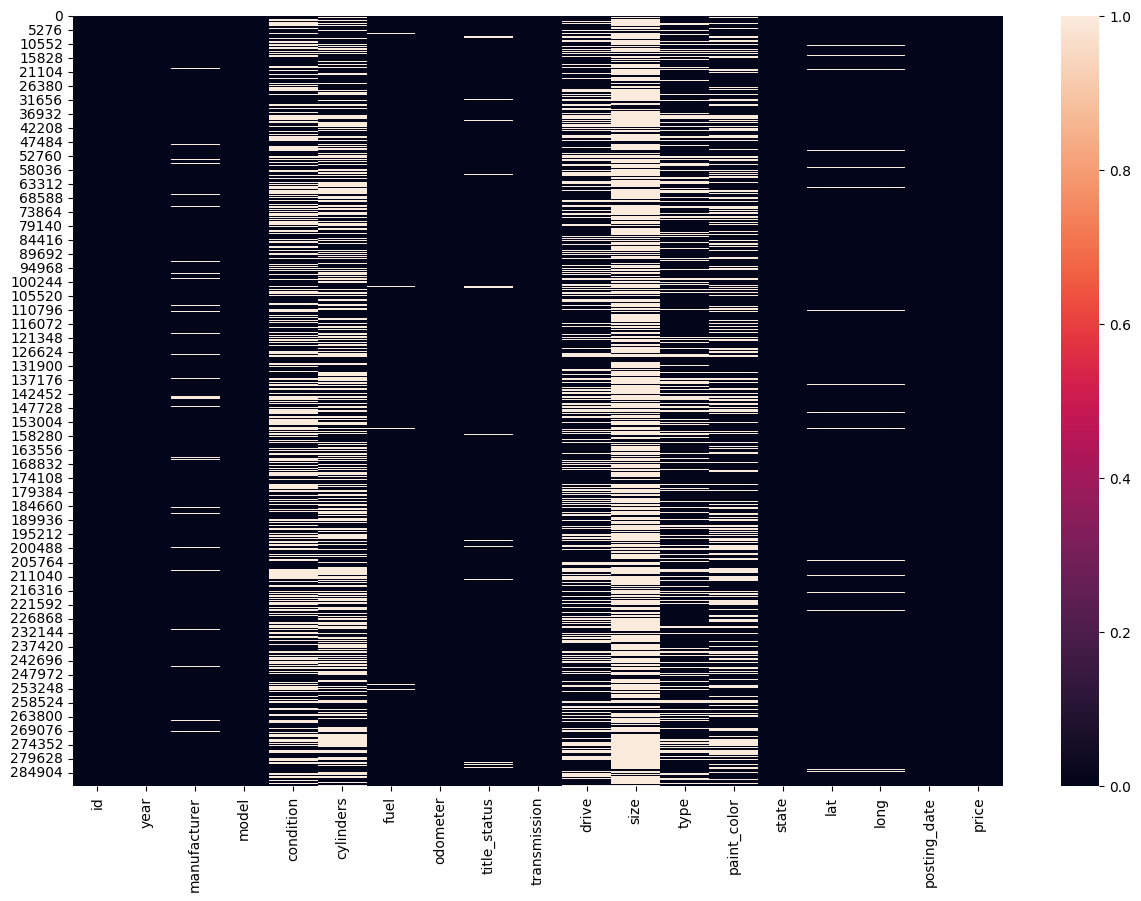

In [10]:
# check null values
plt.figure(figsize=(15,10))
sns.heatmap(train.isnull())
plt.show()

In [6]:
# check for duplicates without id column for train and test data
# in this case we just consider data with same id and same infromation as duplicated data.
print('train duplicated data',train.duplicated().sum())

print('test duplicated data',test.duplicated().sum())

train duplicated data 0
test duplicated data 0


In [12]:
# we can see that we have alot off null values in this data
# this is hard but we wanna to do it
train.isna().sum()

id                   0
year                 0
manufacturer     11342
model                0
condition       116104
cylinders       119300
fuel              1453
odometer             0
title_status      5066
transmission         0
drive            88087
size            207684
type             62596
paint_color      87113
state                0
lat               4403
long              4403
posting_date         0
price                0
dtype: int64

In [53]:
# split the data to X and y
X = train.drop(['price'],axis=1)
y = train['price']

### fill manufacturer column


In [59]:
# define list with the most manufacture appears in real life

manufacturer_list = [
    'toyota', 'volkswagen', 'gm', 'hyundai', 'ford', 'honda', 'nissan', 'bmw', 'fca', 'daimler',
    'subaru', 'mazda', 'renault', 'tata', 'geely', 'kia', 'suzuki', 'volvo', 'peugeot', 'mitsubishi',
    'greatwall', 'saic', 'changan', 'byd', 'proton', 'mahindra', 'isuzu', 'astonmartin', 'lotus', 'jeep',
    'ram', 'lexus', 'audi', 'cadillac', 'chrysler', 'acura', 'buick', 'infiniti', 'mini', 'pontiac', 'jaguar',
    'rover', 'porsche', 'mercury', 'saturn', 'alfa-romeo', 'tesla', 'harley-davidson', 'ferrari', 'datsun',
    'landrover', 'haval', 'brilliance', 'gac', 'jac', 'saipa', 'byton', 'lucid', 'rimac', 'polestar', 'xiaopeng', 'lynkco',
    'nissho', 'iveco', 'baic', 'bellier', 'jmc', 'gaz', 'gwm', 'gacmotor', 'baw', 'chery', 'sceo',
    'bugatti', 'lincoln', 'bentley', 'lamborghini', 'astonmartin', 'rollsroyce', 'maybach', 'pagani',
    'koenigsegg', 'spyker', 'hennessey', 'ariel', 'vector','chevrolet', 'mercedes-benz']


In [60]:
# some manuall catching for some model and it's manufacture
custom_dict = {'hino':'toyota','freightliner':'freightliner','scion':'toyota','smart':'mercedes-benz','hummar':'gm'}

In [61]:
# function to clean text and get good results
def clean_text(text):
    if len(text)> 1 :
        text = text.lower()

        if all(char in string.punctuation or char.isspace() for char in text):
            return "special"
        #keep a-z character
        text = re.sub(r'[^a-zA-Z\s\d]', ' ', text)

        # Remove extra white spaces
        text = ' '.join(text.split())

        return str(text)
    else :
        return (text)


In [62]:
# filling approach
# if element from manufacturer list appears in the model set manufacturer with that name
# else if any catches that i made appears, fill with that catch
# else fill the manufacturer the first words of the model (we don't have null values in model column)
# filling approach
# if element from manufacturer list appears in the model set manufacturer with that name
# else if any catches that i made appears, fill with that catch
# else fill the manufacturer the first words of the model (we don't have null values in model column)
def fill_manu(ma_list, cu_list, df):
    model = clean_text(df.model)
    manufacturer = df['manufacturer']

    if pd.notnull(manufacturer):
        return manufacturer

    brand = model.split()[0]

    if brand in cu_list:
        return custom_dict[brand]

    for word in model.split():
        if word in ma_list:
            return word

    return brand


In [63]:
X['manufacturer'] = X.apply(lambda row : fill_manu(manufacturer_list,custom_dict,row),axis=1)

I will encode manufacture and model column by frequecy encoding



In [98]:
def frequency_encoding(df, columns):
    for col in columns:
        freq_counts = df[col].value_counts(normalize=True).to_dict()
        df[col] = df[col].map(freq_counts)
    return df

# Example usage:
# Assuming 'df' is your DataFrame, and 'cols_to_encode' is a list of column names to be frequency encoded.
cols_to_encode = ['manufacturer', 'model','state']
X_encoded = frequency_encoding(X, cols_to_encode)


## Cylinders Column


filling approach :-

* if the fuel type is electric then fill the cylinders with 0

* else find the nearies nighbor and fill with it

In [54]:
# extract the number of cylender from the data and change it to numerical (float because of null values)

X['cylinders'] = X['cylinders'].str.extract(r'(\d+)')

X['cylinders'].astype('float')

0         NaN
1         NaN
2         NaN
3         NaN
4         6.0
         ... 
290124    NaN
290125    4.0
290126    4.0
290127    6.0
290128    8.0
Name: cylinders, Length: 290129, dtype: float64

In [80]:
def fill_cylinders(df):
    # Create a copy of the DataFrame to avoid modifying the original data
    df_filled = df.copy()

    # Subset the DataFrame for KNN imputation, including only the rows with missing 'cylinders' values
    df_missing_cylinders = df_filled[df_filled['cylinders'].isnull()]

    # Convert 'electric' fuel to 0 cylinders for missing values
    df_missing_cylinders.loc[df_missing_cylinders['fuel'] == 'electric', 'cylinders'] = 0

    if not df_missing_cylinders.empty:
        # Create a KNNImputer object with k=1 (1 nearest neighbor)
        knn_imputer = KNNImputer(n_neighbors=3)

        # Perform KNN imputation on the selected features
        features_for_imputation = df_missing_cylinders[['cylinders','manufacturer', 'model']]
        imputed_features = knn_imputer.fit_transform(features_for_imputation)


        imputed_features = np.round(imputed_features).astype(int)


        # Update the 'cylinders' column with the imputed values
        df_missing_cylinders['cylinders'] = imputed_features[:, 1]

        # Merge the imputed data back into the original DataFrame
        df_filled.update(df_missing_cylinders)

    return df_filled

In [86]:
filled = fill_cylinders(X_encoded)

In [87]:
X_encoded['cylinders'] = filled['cylinders']

In [88]:
X_encoded.cylinders.isna().sum()

0

In [117]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline


## filling fuel column

create model to predict fuel values

In [99]:
X_encoded.isna().sum()

id                   0
year                 0
manufacturer         0
model                0
condition       116104
cylinders            0
fuel              1453
odometer             0
title_status      5066
transmission         0
drive            88087
size            207684
type             62596
paint_color      87113
state                0
lat               4403
long              4403
posting_date         0
dtype: int64

In [100]:
# create model to fill values of fuel type

X_fuel = X_encoded[['year','manufacturer','model','cylinders','odometer','transmission','state','fuel']]

In [128]:
names = X_fuel.transmission.value_counts().index

In [129]:
# apply oneHot encoder into transmission funciton

encoder = OneHotEncoder(handle_unknown='ignore')

encoder_fuel = pd.DataFrame(encoder.fit_transform(X_fuel[['transmission']]).toarray(),columns=names)


final_fuel = X_fuel.join(encoder_fuel)



In [130]:
final_fuel.drop(['transmission'],axis=1,inplace=True)

In [131]:
X_fuel_train = final_fuel[pd.notnull(X_fuel.fuel)]
X_fuel_test = final_fuel[X_fuel.fuel.isna()]

In [132]:
print(final_fuel.shape,X_fuel_train.shape,X_fuel_test.shape)

(290129, 10) (288676, 10) (1453, 10)


In [133]:
XX_fuel_train,XX_fuel_test,yy_fuel_train,yy_fuel_test = train_test_split(X_fuel_train.drop(['fuel'],axis=1),X_fuel_train['fuel'],test_size=0.25,random_state=42)

In [134]:
model = GradientBoostingClassifier()

model.fit(XX_fuel_train,yy_fuel_train)

GradientBoostingClassifier()

In [135]:
model2 = RandomForestClassifier(random_state = 42)
model2.fit(XX_fuel_train,yy_fuel_train)

RandomForestClassifier(random_state=42)

In [138]:
model1_pred = model.predict(XX_fuel_test)

print('accuracy_score = ',accuracy_score(yy_fuel_test,model1_pred))

print('f1_score = ',f1_score(yy_fuel_test,model1_pred,average='micro'))


accuracy_score =  0.8704984134462165
f1_score =  0.8704984134462165


In [139]:
model2_pred = model2.predict(XX_fuel_test)

print('accuracy_score = ',accuracy_score(yy_fuel_test,model2_pred))

print('f1_score = ',f1_score(yy_fuel_test,model2_pred,average='micro'))


accuracy_score =  0.9481771951946126
f1_score =  0.9481771951946125


predect the vlues

In [141]:
X_test = X_fuel_test.drop(['fuel'],axis = 1)

y_test = X_fuel_test['fuel']

In [142]:
fule_nan_values = model2.predict(X_test)

In [149]:
# filling values in the dataset

nan_fuel_index = X[X.fuel.isna()].index

X.loc[nan_fuel_index,'fuel'] = fule_nan_values


## filling title_status column


In [155]:
X.columns

Index(['id', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'title_status', 'transmission', 'drive', 'size', 'type',
       'paint_color', 'state', 'lat', 'long', 'posting_date'],
      dtype='object')

In [156]:
X_title = X[['year','manufacturer','model','cylinders','odometer','transmission','state','fuel','title_status']]


In [158]:
X_title.head()

,year,manufacturer,model,cylinders,odometer,transmission,state,fuel,title_status
0,2007.0,0.011409,0.005522,0.0,214740.0,automatic,0.016596,gas,clean
1,2008.0,0.016606,0.003598,0.0,170276.0,automatic,0.031903,gas,clean
2,2003.0,0.019515,0.003943,0.0,176910.0,automatic,0.034974,gas,clean
3,2017.0,0.035081,0.001713,0.0,41000.0,automatic,0.117138,gas,clean
4,2008.0,0.085614,0.004105,6,138900.0,automatic,0.032182,gas,clean


In [175]:
names = np.concatenate((X_title.transmission.value_counts().index,
               np.array(X_title.fuel.value_counts().index)))


In [177]:
 #apply oneHot encoder into transmission feature

encoder = OneHotEncoder(handle_unknown='ignore')

encoder_title = pd.DataFrame(encoder.fit_transform(X_title[['transmission','fuel']]).toarray(),columns= names)


final_title = X_title.join(encoder_title)

final_title.drop(['transmission','fuel'],axis=1,inplace=True)

final_title.head()

,year,manufacturer,model,cylinders,odometer,state,title_status,automatic,other,manual,gas,other,diesel,hybrid,electric
0,2007.0,0.011409,0.005522,0.0,214740.0,0.016596,clean,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2008.0,0.016606,0.003598,0.0,170276.0,0.031903,clean,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2003.0,0.019515,0.003943,0.0,176910.0,0.034974,clean,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2017.0,0.035081,0.001713,0.0,41000.0,0.117138,clean,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2008.0,0.085614,0.004105,6,138900.0,0.032182,clean,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [178]:
X_title_train = final_title[pd.notnull(X_title.title_status)]
X_title_test = final_title[X_title.title_status.isna()]

In [179]:
print(final_title.shape,X_title_train.shape,X_title_test.shape)

(290129, 15) (285063, 15) (5066, 15)


In [183]:
XX_title_train,XX_title_test,yy_title_train,yy_title_test = train_test_split(X_title_train.drop(['title_status'],axis=1),X_title_train['title_status'],
                                                                            random_state=42,test_size=0.3)

In [185]:
model = RandomForestClassifier()
model.fit(XX_title_train,yy_title_train)

RandomForestClassifier()

In [186]:
model2 = GradientBoostingClassifier()
model2.fit(XX_title_train,yy_title_train)

GradientBoostingClassifier()

In [187]:
model1_pred = model.predict(XX_title_test)

print('accuracy_score = ',accuracy_score(yy_title_test,model1_pred))

print('f1_score = ',f1_score(yy_title_test,model1_pred,average='micro'))

accuracy_score =  0.9726259661595669
f1_score =  0.9726259661595669


In [188]:
model2_pred = model2.predict(XX_title_test)

print('accuracy_score = ',accuracy_score(yy_title_test,model2_pred))

print('f1_score = ',f1_score(yy_title_test,model2_pred,average='micro'))

accuracy_score =  0.9672002712847437
f1_score =  0.9672002712847437


In [189]:
X_test = X_title_test.drop(['title_status'],axis = 1)


In [190]:
title_nan_vlues = model.predict(X_test)

In [191]:
nan_title_index = X[X.title_status.isna()].index

X.loc[nan_title_index,'title_status'] = title_nan_vlues

In [192]:
X.isna().sum()

id                   0
year                 0
manufacturer         0
model                0
condition       116104
cylinders            0
fuel                 0
odometer             0
title_status         0
transmission         0
drive            88087
size            207684
type             62596
paint_color      87113
state                0
lat               4403
long              4403
posting_date         0
dtype: int64

### filling drive nan values

we will build a model to predict values for these

In [200]:
X_drive = X[['year','manufacturer','model','cylinders','odometer','transmission','state','fuel','title_status','drive']]

In [202]:
#apply oneHot encoder into transmission feature

encoder = OneHotEncoder(handle_unknown='ignore')

encoder_drive = pd.DataFrame(encoder.fit_transform(X_drive[['transmission','fuel',]]).toarray(),columns= names)
# apply label encoding for title_status column
# label_mapping = {
#     'clean': 5,
#     'rebuilt': 4,
#     'salvage': 3,
#     'lien': 2,
#     'missing': 1,
#     'parts only': 0
# }
# X_drive.title_status = X_drive.title_status.map(label_mapping)

final_drive = X_drive.join(encoder_title)

final_drive.drop(['transmission','fuel'],axis=1,inplace=True)
#apply label encoding for title_status column
label_mapping = {
    'clean': 5,
    'rebuilt': 4,
    'salvage': 3,
    'lien': 2,
    'missing': 1,
    'parts only': 0
}
final_drive.title_status = final_drive.title_status.map(label_mapping)
final_drive.head()

,year,manufacturer,model,cylinders,odometer,state,title_status,drive,automatic,other,manual,gas,other,diesel,hybrid,electric
0,2007.0,0.011409,0.005522,0.0,214740.0,0.016596,5,rwd,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2008.0,0.016606,0.003598,0.0,170276.0,0.031903,5,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2003.0,0.019515,0.003943,0.0,176910.0,0.034974,5,fwd,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2017.0,0.035081,0.001713,0.0,41000.0,0.117138,5,4wd,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2008.0,0.085614,0.004105,6,138900.0,0.032182,5,4wd,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [207]:
X_drive_train = final_drive[pd.notnull(X_drive.drive)]
X_drive_test = final_drive[X_drive.drive.isna()]

In [210]:

print(final_drive.shape,X_drive_train.shape,X_drive_test.shape)

(290129, 16) (202042, 16) (88087, 16)


In [211]:
XX_drive_train,XX_drive_test,yy_drive_train,yy_drive_test = train_test_split(X_drive_train.drop(['drive'],axis=1),X_drive_train['drive'],
                                                                            random_state=42,test_size=0.3)

In [212]:
forest_drive = RandomForestClassifier()
forest_drive.fit(XX_drive_train,yy_drive_train)

RandomForestClassifier()

In [213]:
gradient_drive = GradientBoostingClassifier()
gradient_drive.fit(XX_drive_train,yy_drive_train)

GradientBoostingClassifier()

In [214]:
model1_pred = forest_drive.predict(XX_drive_test)

print('accuracy_score = ',accuracy_score(yy_drive_test,model1_pred))

print('f1_score = ',f1_score(yy_drive_test,model1_pred,average='micro'))

accuracy_score =  0.8700443799184994
f1_score =  0.8700443799184994


In [215]:
model2_pred = gradient_drive.predict(XX_drive_test)

print('accuracy_score = ',accuracy_score(yy_drive_test,model2_pred))

print('f1_score = ',f1_score(yy_drive_test,model2_pred,average='micro'))

accuracy_score =  0.7369376206424364
f1_score =  0.7369376206424365


In [217]:
X_drive_test = X_drive_test.drop(['drive'],axis=1)

nan_drive_values = forest_drive.predict(X_drive_test)

In [218]:
nan_drive_index = X[X.drive.isna()].index

X.loc[nan_drive_index,'drive'] = nan_drive_values

In [220]:
X.isna().sum()

id                   0
year                 0
manufacturer         0
model                0
condition       116104
cylinders            0
fuel                 0
odometer             0
title_status         0
transmission         0
drive                0
size            207684
type             62596
paint_color      87113
state                0
lat               4403
long              4403
posting_date         0
dtype: int64

In [221]:
X['type'].value_counts()

sedan          59518
SUV            52769
pickup         29145
truck          24431
other          14439
coupe          13139
hatchback      11481
wagon           7382
van             5843
convertible     5320
mini-van        3297
offroad          415
bus              354
Name: type, dtype: int64